In [31]:
import json
import random

In [32]:
#Establising Connections on blockchain

In [33]:
#Connection to Blockchain
from web3 import Web3
web3 = Web3(Web3.HTTPProvider('HTTP://127.0.0.1:7545'))
print("isConnected:",web3.isConnected())

#gettin lists of accounts available, Account[0] will be like an auditor account
accounts_list = web3.eth.accounts
for i in accounts_list:
    print(i)

isConnected: True
0x7E53e4b6Cb20F25463Fd53378da71F28Fa68da8d
0x3253298F005Ba182429376dF608667c115554aF2
0xb6602c2905656Bb8bb71b5DA231481e88B0A3276
0x31eBd9E860C95A72C219103b091a98f1FBB3fB2F
0xBcB37986c0f4d7891e8Dc069C76a9baE017CaCb7


In [34]:
#from index 1 to index 4, they will represent each GRID, so mapping them to regions A1, A2, A3, A4 resp.
GRID_accounts = {}
GRID_connections = set()

#Making Dictionary
for i in range(1,len(accounts_list)):
    GRID_accounts['A'+str(i)] = accounts_list[i]
print(GRID_accounts)
print()
#Printing then sequence wise
for k, v in GRID_accounts.items():
    print(k,':',v)


{'A1': '0x3253298F005Ba182429376dF608667c115554aF2', 'A2': '0xb6602c2905656Bb8bb71b5DA231481e88B0A3276', 'A3': '0x31eBd9E860C95A72C219103b091a98f1FBB3fB2F', 'A4': '0xBcB37986c0f4d7891e8Dc069C76a9baE017CaCb7'}

A1 : 0x3253298F005Ba182429376dF608667c115554aF2
A2 : 0xb6602c2905656Bb8bb71b5DA231481e88B0A3276
A3 : 0x31eBd9E860C95A72C219103b091a98f1FBB3fB2F
A4 : 0xBcB37986c0f4d7891e8Dc069C76a9baE017CaCb7


In [35]:
'''
These are two functions which will be used to establish/destablish connection between GRID, 
based on this we will add/remove connection in GRID)connections e.g. A1-A2, A1-A3, etc. 

And also it will be used to transact on the blockchain, which will record the connections and disconnections
'''

def establish_connection(from_,to_):
    
    #adding connections to GRID_connections set.
    try:
        GRID_connections.add(from_ +'-'+ to_)    
        #Interacting with blockchain to transact (enableConnections).
        contract_MappingAddressConnection.functions.enableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Establihed"
    except :
        return "Connection Already Exists"
        #later try except Exception as error to read from response
        
def destablish_connection(from_,to_):
    #removing connections from GRID_connections set.
    
    try:
        GRID_connections.remove(from_ +'-'+ to_)
        #Interacting with blockchain to transact.
        contract_MappingAddressConnection.functions.disableConnections(from_,to_).transact({'from':accounts_list[0]})
        return "Connection Destablished"
    except :
        return "No connection exists to disconnect"

In [36]:
#First CONTRACT Deployment
with open('build/contracts/MappingAddressConnection.json') as f:
  first_migration = json.load(f)

first_migration_contract_address = first_migration['networks']['5777']['address']
first_migration_abi = first_migration['abi']
contract_MappingAddressConnection = web3.eth.contract(address=first_migration_contract_address, abi = first_migration_abi)

In [37]:
#Adding connections
print(establish_connection(GRID_accounts['A1'],GRID_accounts['A2']))
print(establish_connection(GRID_accounts['A1'],GRID_accounts['A3']))
print(establish_connection(GRID_accounts['A2'],GRID_accounts['A1']))
print(establish_connection(GRID_accounts['A2'],GRID_accounts['A4']))
print(establish_connection(GRID_accounts['A3'],GRID_accounts['A1']))
print(establish_connection(GRID_accounts['A3'],GRID_accounts['A4']))
print(establish_connection(GRID_accounts['A4'],GRID_accounts['A2']))
print(establish_connection(GRID_accounts['A4'],GRID_accounts['A3']))

Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed
Connection Establihed


In [8]:
# #Removing Connection
# print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A2']))
# print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A3']))
# print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A1']))
# print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A4']))
# print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A1']))
# print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A4']))
# print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A2']))
# print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A3']))

### Part 2 : Sending arbitraty values among grid

### 2.1. Importing Values from CSV

In [9]:
import pandas as pd

In [10]:
A1_A2 = pd.read_csv('../Seperated_Excel_WD/A1_A2.csv', header=None)
A1_A3 = pd.read_csv('../Seperated_Excel_WD/A1_A3.csv', header=None)
A2_A1 = pd.read_csv('../Seperated_Excel_WD/A2_A1.csv', header=None)
A2_A4 = pd.read_csv('../Seperated_Excel_WD/A2_A4.csv', header=None)
A3_A1 = pd.read_csv('../Seperated_Excel_WD/A3_A1.csv', header=None)
A3_A4 = pd.read_csv('../Seperated_Excel_WD/A3_A4.csv', header=None)
A4_A2 = pd.read_csv('../Seperated_Excel_WD/A4_A2.csv', header=None)
A4_A3 = pd.read_csv('../Seperated_Excel_WD/A4_A3.csv', header=None)

In [11]:
def dataFrame_to_Dict(data):
    #data_dictionary = {}
    data_list = []
    for i,j in data.iteritems():
        dict_j = []
        for z in j:
            dict_j.append(str(z))
        #data_dictionary[str(i)] = dict_j
        data_list.append(dict_j)
    #return data_dictionary
    return data_list

In [12]:
#interating through data and putting in dictionary
data_A1_A2 = dataFrame_to_Dict(A1_A2)
data_A1_A3 = dataFrame_to_Dict(A1_A3)
data_A2_A1 = dataFrame_to_Dict(A2_A1)
data_A2_A4 = dataFrame_to_Dict(A2_A4)
data_A3_A1 = dataFrame_to_Dict(A3_A1)
data_A3_A4 = dataFrame_to_Dict(A3_A4)
data_A4_A2 = dataFrame_to_Dict(A4_A2)
data_A4_A3 = dataFrame_to_Dict(A4_A3)

# #Printing then sequence wise
# for k, v in data_A2_A1.items():
#     print(k,':',v)

In [13]:
#Data connection set:
GRID_Connections = {'A1_A2' : data_A1_A2,
                    'A1_A3' : data_A1_A3,
                    'A2_A1' : data_A2_A1,
                    'A2_A4' : data_A2_A4,
                    'A3_A1' : data_A3_A1,
                    'A3_A4' : data_A3_A4,
                    'A4_A2' : data_A4_A2,
                    'A4_A3' : data_A4_A3
                   }

# #Printing then sequence wise
# for k, v in GRID_Connections.items():
#     print(k,':',v)
#     print()

In [14]:
#Second CONTRACT Deployment
with open('build/contracts/passingArbitraryArguments.json') as f:
  second_migration = json.load(f)

second_migration_contract_address = second_migration['networks']['5777']['address']
second_migration_abi = second_migration['abi']

contract_passingArbitraryArguments = web3.eth.contract(address=second_migration_contract_address, abi = second_migration_abi)

In [15]:
def data_transaction(sender,receiver,iteration,amount):
    
        try:
            contract_passingArbitraryArguments.functions.passingValues(sender,receiver,iteration,amount).transact({'from':sender})
            return "OKo!"
        except:
            return "No connection"
    

In [16]:
# '''
# THIS HERE IS JUST A PROTOTYPE FUNCTIONING, of RANDOM PAYLOADS
# '''

# for i in range(10):
#     sender, receiver = random.sample(range(1,len(accounts_list)),2)
    
#     #transaction Details
#     _sender = accounts_list[random_sender]
#     _valueReceiver = accounts_list[random_receiver]
    
#     #arbtrary string list
#     _value = [str(random.uniform(-0.1, 0.1))[:6] for i in range(random.randint(1, 4))]
#     #_value = str(random.randint(1, 4))
#     _iterations = i
    
#     print(f'''
#            _sender: {_sender}
#     _valueReceiver: {_valueReceiver}
#             _value: {_value}
#        _iterations: {_iterations}
#     ''')
#     #contract_passingArbitraryArguments.functions.passingValues(_sender,_valueReceiver,_iterations,_value).transact({'from':_sender})
#     print(data_transaction(_sender,_valueReceiver,_iterations,_value),'\n')
    

## Working with real Data

In [17]:
counter = 0
processing = True
while processing:
    print('''
__________________________
''')
    for key in GRID_Connections.keys():
        try:
            sender, receiver = key.split("_")
            payload = GRID_Connections[key][counter]
            print(f'''
            counter  : {counter}
            Sender   : {sender}
            Receiver : {receiver}
            payload  : {payload}
            ''')
            #print(key, GRID_Connections[key][counter])
            #Transacting on Blockchain
            print(data_transaction(GRID_accounts[sender],GRID_accounts[receiver],counter,payload))
            
            
        except IndexError:
            processing = False
            break
    counter += 1
    



__________________________


            counter  : 0
            Sender   : A1
            Receiver : A2
            payload  : ['0', '0', '1', '1']
            
OKo!

            counter  : 0
            Sender   : A1
            Receiver : A3
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A2
            Receiver : A1
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A2
            Receiver : A4
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A3
            Receiver : A1
            payload  : ['0', '1']
            
OKo!

            counter  : 0
            Sender   : A3
            Receiver : A4
            payload  : ['0', '0', '1', '1']
            
OKo!

            counter  : 0
            Sender   : A4
            Receiver : A2
            payload  : ['0', '0', '1', '1']
            
OKo!

            counter  : 0
     

OKo!

            counter  : 6
            Sender   : A1
            Receiver : A3
            payload  : ['-0.0465653173371733', '1.01720286178024']
            
OKo!

            counter  : 6
            Sender   : A2
            Receiver : A1
            payload  : ['-0.0333878046700264', '0.982797138219761']
            
OKo!

            counter  : 6
            Sender   : A2
            Receiver : A4
            payload  : ['-0.0540995519778015', '0.987051937079541']
            
OKo!

            counter  : 6
            Sender   : A3
            Receiver : A1
            payload  : ['0.028412584344337', '0.982797138219761']
            
OKo!

            counter  : 6
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0194087533462373', '0.028412584344337', '1.01720286178024', '0.982797138219761']
            
OKo!

            counter  : 6
            Sender   : A4
            Receiver : A2
            payload  : ['-0.0246644265994966', '-0.03071586

OKo!

            counter  : 11
            Sender   : A4
            Receiver : A3
            payload  : ['-0.14951938795127898', '-0.0687147240806964', '0.9713675754507571', '0.981817799380728']
            
OKo!

__________________________


            counter  : 12
            Sender   : A1
            Receiver : A2
            payload  : ['-0.0823269348541984', '-0.0295912016196705', '1.00524150118441', '0.9844157579191509']
            
OKo!

            counter  : 12
            Sender   : A1
            Receiver : A3
            payload  : ['-0.0706020966174043', '1.02988799424258']
            
OKo!

            counter  : 12
            Sender   : A2
            Receiver : A1
            payload  : ['-0.0970935037266479', '0.9779301402151729']
            
OKo!

            counter  : 12
            Sender   : A2
            Receiver : A4
            payload  : ['-0.0949751538434308', '0.98312515697879']
            
OKo!

            counter  : 12
            Sender   : A3

OKo!

            counter  : 17
            Sender   : A2
            Receiver : A1
            payload  : ['-0.0849173487215891', '0.984336023951739']
            
OKo!

            counter  : 17
            Sender   : A2
            Receiver : A4
            payload  : ['-0.105833617531269', '0.9834442647395301']
            
OKo!

            counter  : 17
            Sender   : A3
            Receiver : A1
            payload  : ['-0.100536242476303', '0.986737421062634']
            
OKo!

            counter  : 17
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0630668026356753', '-0.100536242476303', '1.01465101471618', '0.986737421062634']
            
OKo!

            counter  : 17
            Sender   : A4
            Receiver : A2
            payload  : ['-0.11490191631061', '-0.123415258554907', '0.9762730566300172', '1.00290182820973']
            
OKo!

            counter  : 17
            Sender   : A4
            Receiver : A3
         

OKo!

            counter  : 23
            Sender   : A1
            Receiver : A3
            payload  : ['-0.119598961054104', '1.01218424253144']
            
OKo!

            counter  : 23
            Sender   : A2
            Receiver : A1
            payload  : ['-0.14325563647083803', '0.986335299365141']
            
OKo!

            counter  : 23
            Sender   : A2
            Receiver : A4
            payload  : ['-0.143997955275456', '0.98711479558752']
            
OKo!

            counter  : 23
            Sender   : A3
            Receiver : A1
            payload  : ['-0.11532987467625999', '0.969678374084475']
            
OKo!

            counter  : 23
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0845211043024511', '-0.11532987467625999', '1.02001857619111', '0.969678374084475']
            
OKo!

            counter  : 23
            Sender   : A4
            Receiver : A2
            payload  : ['-0.15080076984880803', '

OKo!

            counter  : 28
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0643834488768272', '-0.0993817820906552', '1.00879179164413', '0.9722670993438209']
            
OKo!

            counter  : 28
            Sender   : A4
            Receiver : A2
            payload  : ['-0.115149879746064', '-0.150823318705319', '0.975466001232101', '1.00287830167286']
            
OKo!

            counter  : 28
            Sender   : A4
            Receiver : A3
            payload  : ['-0.18341794498767897', '-0.115149879746064', '0.9753851801955742', '0.975466001232101']
            
OKo!

__________________________


            counter  : 29
            Sender   : A1
            Receiver : A2
            payload  : ['-0.15060745769836803', '-0.153509581077608', '0.9980132089825658', '0.9969535630389659']
            
OKo!

            counter  : 29
            Sender   : A1
            Receiver : A3
            payload  : ['-0.13638031334224002', '1.

OKo!

            counter  : 34
            Sender   : A2
            Receiver : A4
            payload  : ['-0.17781503871992302', '0.9816540063822329']
            
OKo!

            counter  : 34
            Sender   : A3
            Receiver : A1
            payload  : ['-0.149734050798925', '0.9887333402384999']
            
OKo!

            counter  : 34
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0877015539028548', '-0.149734050798925', '1.02005609009878', '0.9887333402384999']
            
OKo!

            counter  : 34
            Sender   : A4
            Receiver : A2
            payload  : ['-0.17549773941463298', '-0.171689873349577', '0.9739731683741221', '1.0061492613402399']
            
OKo!

            counter  : 34
            Sender   : A4
            Receiver : A3
            payload  : ['-0.230274239915701', '-0.17549773941463298', '0.9693366109931191', '0.9739731683741221']
            
OKo!

__________________________


   

OKo!

__________________________


            counter  : 40
            Sender   : A1
            Receiver : A2
            payload  : ['-0.20627872316015097', '-0.22976390905181698', '0.992435945378292', '0.996453224194745']
            
OKo!

            counter  : 40
            Sender   : A1
            Receiver : A3
            payload  : ['-0.215738287251626', '1.01327908089349']
            
OKo!

            counter  : 40
            Sender   : A2
            Receiver : A1
            payload  : ['-0.191116134531057', '0.9773644705873861']
            
OKo!

            counter  : 40
            Sender   : A2
            Receiver : A4
            payload  : ['-0.174290124072911', '0.9765702737377929']
            
OKo!

            counter  : 40
            Sender   : A3
            Receiver : A1
            payload  : ['-0.12433688683558', '0.985215697034823']
            
OKo!

            counter  : 40
            Sender   : A3
            Receiver : A4
            payload 

OKo!

            counter  : 45
            Sender   : A2
            Receiver : A4
            payload  : ['-0.19142473529936604', '0.9946999604462791']
            
OKo!

            counter  : 45
            Sender   : A3
            Receiver : A1
            payload  : ['-0.11233855989153302', '0.977165975582145']
            
OKo!

            counter  : 45
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0725939754541979', '-0.11233855989153302', '1.0257499824627498', '0.977165975582145']
            
OKo!

            counter  : 45
            Sender   : A4
            Receiver : A2
            payload  : ['-0.13693717184619802', '-0.17390208810346303', '0.985231178822525', '1.00585408755426']
            
OKo!

            counter  : 45
            Sender   : A4
            Receiver : A3
            payload  : ['-0.19907200765911803', '-0.13693717184619802', '0.985429440052952', '0.985231178822525']
            
OKo!

__________________________




OKo!

            counter  : 50
            Sender   : A4
            Receiver : A3
            payload  : ['-0.20410065920544', '-0.138043832900686', '0.979443896284496', '0.984440194913602']
            
OKo!

__________________________


            counter  : 51
            Sender   : A1
            Receiver : A2
            payload  : ['-0.209287064103121', '-0.22521780600718397', '1.00590907078408', '1.0091922435354699']
            
OKo!

            counter  : 51
            Sender   : A1
            Receiver : A3
            payload  : ['-0.20343135700657897', '1.0283635315502']
            
OKo!

            counter  : 51
            Sender   : A2
            Receiver : A1
            payload  : ['-0.20245130943174103', '0.9997617187168301']
            
OKo!

            counter  : 51
            Sender   : A2
            Receiver : A4
            payload  : ['-0.195963480983725', '1.00949794043836']
            
OKo!

            counter  : 51
            Sender   : A3
    

OKo!

            counter  : 56
            Sender   : A3
            Receiver : A1
            payload  : ['-0.11905980189675', '0.9808613229163331']
            
OKo!

            counter  : 56
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0757344623769378', '-0.11905980189675', '1.01383658897001', '0.9808613229163331']
            
OKo!

            counter  : 56
            Sender   : A4
            Receiver : A2
            payload  : ['-0.142046622612216', '-0.176104002208196', '0.978146611277347', '1.0191734349858699']
            
OKo!

            counter  : 56
            Sender   : A4
            Receiver : A3
            payload  : ['-0.20771213978452802', '-0.142046622612216', '0.9702802240890941', '0.978146611277347']
            
OKo!

__________________________


            counter  : 57
            Sender   : A1
            Receiver : A2
            payload  : ['-0.225522005534332', '-0.24120608343809302', '1.02104974389707', '1.01255

OKo!

            counter  : 62
            Sender   : A2
            Receiver : A1
            payload  : ['-0.217389370700459', '1.02969534098751']
            
OKo!

            counter  : 62
            Sender   : A2
            Receiver : A4
            payload  : ['-0.21155589871261102', '1.0334876240189201']
            
OKo!

            counter  : 62
            Sender   : A3
            Receiver : A1
            payload  : ['-0.124228904768809', '0.9846113420532628']
            
OKo!

            counter  : 62
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0762685124950882', '-0.124228904768809', '1.02018242521229', '0.9846113420532628']
            
OKo!

            counter  : 62
            Sender   : A4
            Receiver : A2
            payload  : ['-0.14582900715505404', '-0.18847288536828802', '0.981873373501549', '1.03704100242383']
            
OKo!

            counter  : 62
            Sender   : A4
            Receiver : A3
   

OKo!

            counter  : 68
            Sender   : A1
            Receiver : A3
            payload  : ['-0.252857441539492', '1.04449207512705']
            
OKo!

            counter  : 68
            Sender   : A2
            Receiver : A1
            payload  : ['-0.261988994200639', '1.01392773777543']
            
OKo!

            counter  : 68
            Sender   : A2
            Receiver : A4
            payload  : ['-0.255633812229272', '1.01688584695746']
            
OKo!

            counter  : 68
            Sender   : A3
            Receiver : A1
            payload  : ['-0.144455909465688', '0.9942765186990559']
            
OKo!

            counter  : 68
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0837458268373415', '-0.144455909465688', '1.02610003639173', '0.9942765186990559']
            
OKo!

            counter  : 68
            Sender   : A4
            Receiver : A2
            payload  : ['-0.167852704238395', '-0.2250

OKo!

            counter  : 73
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0906601360043716', '-0.160508884347675', '1.02495912692196', '0.996838091546825']
            
OKo!

            counter  : 73
            Sender   : A4
            Receiver : A2
            payload  : ['-0.18752210289931898', '-0.244785749400316', '0.9935002847012819', '1.02653791042729']
            
OKo!

            counter  : 73
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23175236623723605', '-0.18752210289931898', '0.987594119991405', '0.9935002847012819']
            
OKo!

__________________________


            counter  : 74
            Sender   : A1
            Receiver : A2
            payload  : ['-0.272163770001643', '-0.279383649855518', '1.02778936855205', '1.0285604500492098']
            
OKo!

            counter  : 74
            Sender   : A1
            Receiver : A3
            payload  : ['-0.26350362597489896', '1.0

OKo!

            counter  : 79
            Sender   : A1
            Receiver : A3
            payload  : ['-0.262201100755732', '1.05090874977465']
            
OKo!

            counter  : 79
            Sender   : A2
            Receiver : A1
            payload  : ['-0.272740530426948', '1.0103354781078802']
            
OKo!

            counter  : 79
            Sender   : A2
            Receiver : A4
            payload  : ['-0.26886920312705104', '1.01107555684772']
            
OKo!

            counter  : 79
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15914696233096698', '0.9962224932280241']
            
OKo!

            counter  : 79
            Sender   : A3
            Receiver : A4
            payload  : ['-0.09026244094598301', '-0.15914696233096698', '1.02473999243527', '0.9962224932280241']
            
OKo!

            counter  : 79
            Sender   : A4
            Receiver : A2
            payload  : ['-0.186066886524482',

OKo!

            counter  : 84
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23130207515769102', '-0.185889216959899', '0.987847172305731', '0.992735728233784']
            
OKo!

__________________________


            counter  : 85
            Sender   : A1
            Receiver : A2
            payload  : ['-0.269567322097098', '-0.27814290117022494', '1.02670689849873', '1.02737890302472']
            
OKo!

            counter  : 85
            Sender   : A1
            Receiver : A3
            payload  : ['-0.262117418512549', '1.05114088980123']
            
OKo!

            counter  : 85
            Sender   : A2
            Receiver : A1
            payload  : ['-0.272827068158016', '1.0100457570727501']
            
OKo!

            counter  : 85
            Sender   : A2
            Receiver : A4
            payload  : ['-0.268938672886052', '1.01059853621326']
            
OKo!

            counter  : 85
            Sender   : A3
      

OKo!

            counter  : 90
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15891877782284', '0.9965194361616909']
            
OKo!

            counter  : 90
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0901465131874578', '-0.15891877782284', '1.0250170129708198', '0.9965194361616909']
            
OKo!

            counter  : 90
            Sender   : A4
            Receiver : A2
            payload  : ['-0.18580846340618498', '-0.24016573835652602', '0.992882112228309', '1.0258365925258']
            
OKo!

            counter  : 90
            Sender   : A4
            Receiver : A3
            payload  : ['-0.231194723640219', '-0.18580846340618498', '0.987994180920994', '0.992882112228309']
            
OKo!

__________________________


            counter  : 91
            Sender   : A1
            Receiver : A2
            payload  : ['-0.269455408802975', '-0.27797934158866805', '1.02668526578383', '1.027

OKo!

            counter  : 96
            Sender   : A1
            Receiver : A3
            payload  : ['-0.261794290597189', '1.05151680689227']
            
OKo!

            counter  : 96
            Sender   : A2
            Receiver : A1
            payload  : ['-0.27251515912470603', '1.01054281397121']
            
OKo!

            counter  : 96
            Sender   : A2
            Receiver : A4
            payload  : ['-0.268683072508635', '1.0110791268052701']
            
OKo!

            counter  : 96
            Sender   : A3
            Receiver : A1
            payload  : ['-0.158735330907953', '0.9971242374885981']
            
OKo!

            counter  : 96
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0900412076236864', '-0.158735330907953', '1.02563245130967', '0.9971242374885981']
            
OKo!

            counter  : 96
            Sender   : A4
            Receiver : A2
            payload  : ['-0.185589804996076', '-0.

OKo!

            counter  : 101
            Sender   : A3
            Receiver : A4
            payload  : ['-0.09001713063687', '-0.15872020830393502', '1.02593378532964', '0.9974410669896729']
            
OKo!

            counter  : 101
            Sender   : A4
            Receiver : A2
            payload  : ['-0.185551099076094', '-0.239831906627982', '0.9938194182356709', '1.0268015584182']
            
OKo!

            counter  : 101
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23081954873028698', '-0.185551099076094', '0.988957114219155', '0.9938194182356709']
            
OKo!

__________________________


            counter  : 102
            Sender   : A1
            Receiver : A2
            payload  : ['-0.26911188941318', '-0.277549181300197', '1.02769254873366', '1.0282471263462198']
            
OKo!

            counter  : 102
            Sender   : A1
            Receiver : A3
            payload  : ['-0.261606791433663', '1.052

OKo!

            counter  : 107
            Sender   : A1
            Receiver : A3
            payload  : ['-0.261070894194842', '1.0527950417534102']
            
OKo!

            counter  : 107
            Sender   : A2
            Receiver : A1
            payload  : ['-0.271742060912121', '1.0117400831588']
            
OKo!

            counter  : 107
            Sender   : A2
            Receiver : A4
            payload  : ['-0.26783073628361803', '1.01236298479258']
            
OKo!

            counter  : 107
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15831851144679698', '0.9984220461308159']
            
OKo!

            counter  : 107
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0898146876072219', '-0.15831851144679698', '1.02691286153004', '0.9984220461308159']
            
OKo!

            counter  : 107
            Sender   : A4
            Receiver : A2
            payload  : ['-0.1850975465627

OKo!

            counter  : 112
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23012073987466', '-0.184972797277029', '0.990430751964567', '0.99530163647029']
            
OKo!

__________________________


            counter  : 113
            Sender   : A1
            Receiver : A2
            payload  : ['-0.268448454612035', '-0.27694797130785603', '1.0290678314147501', '1.0296990098490202']
            
OKo!

            counter  : 113
            Sender   : A1
            Receiver : A3
            payload  : ['-0.26100617550773003', '1.0534278999369302']
            
OKo!

            counter  : 113
            Sender   : A2
            Receiver : A1
            payload  : ['-0.271681925610938', '1.01246986084638']
            
OKo!

            counter  : 113
            Sender   : A2
            Receiver : A4
            payload  : ['-0.267794909843731', '1.01301823912']
            
OKo!

            counter  : 113
            Sender   : A3
 

OKo!

            counter  : 118
            Sender   : A2
            Receiver : A4
            payload  : ['-0.267560869227162', '1.0130084532891']
            
OKo!

            counter  : 118
            Sender   : A3
            Receiver : A1
            payload  : ['-0.15816526159837802', '0.99904856724729']
            
OKo!

            counter  : 118
            Sender   : A3
            Receiver : A4
            payload  : ['-0.0897268450975093', '-0.15816526159837802', '1.02751965216722', '0.99904856724729']
            
OKo!

            counter  : 118
            Sender   : A4
            Receiver : A2
            payload  : ['-0.184923557861287', '-0.23899144136015898', '0.995419720347811', '1.02829081481597']
            
OKo!

            counter  : 118
            Sender   : A4
            Receiver : A3
            payload  : ['-0.23007543157658603', '-0.184923557861287', '0.9905813426196981', '0.995419720347811']
            
OKo!

__________________________


       

OKo!

            counter  : 123
            Sender   : A4
            Receiver : A3
            payload  : ['-0.227960359391977', '-0.183186489255356', '0.9953204960721279', '1.00006627190973']
            
OKo!

__________________________


            counter  : 124
            Sender   : A1
            Receiver : A2
            payload  : ['-0.265742565620718', '-0.27418526806517196', '1.03371200921557', '1.03431325247163']
            
OKo!

            counter  : 124
            Sender   : A1
            Receiver : A3
            payload  : ['-0.25838527922755605', '1.05794222786342']
            
OKo!

            counter  : 124
            Sender   : A2
            Receiver : A1
            payload  : ['-0.26895562971701', '1.01719331768887']
            
OKo!

            counter  : 124
            Sender   : A2
            Receiver : A4
            payload  : ['-0.26510762399109805', '1.01776573048312']
            
OKo!

            counter  : 124
            Sender   : A3
 

In [18]:
counter

129

In [19]:
#Making transaction

In [20]:
#Removing Connection
print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A2']))
print(destablish_connection(GRID_accounts['A1'],GRID_accounts['A3']))
print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A1']))
print(destablish_connection(GRID_accounts['A2'],GRID_accounts['A4']))
print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A1']))
print(destablish_connection(GRID_accounts['A3'],GRID_accounts['A4']))
print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A2']))
print(destablish_connection(GRID_accounts['A4'],GRID_accounts['A3']))

Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished
Connection Destablished


## Retireving Data (filters)

In [21]:
#Retrieveing data per Grid.

%time

for i in range(counter-1):
    event_filter = contract_passingArbitraryArguments.events.NewTrade.createFilter(fromBlock=0,toBlock = 'latest',argument_filters={"_from":accounts_list[1],"to": accounts_list[2],"iteration":i})
    print(event_filter.get_all_entries())


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


## Plots

In [22]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from web3 import Web3
import json

In [23]:
#Initialization
#Here we are asuming that all the transactions are complete
total_blocks = web3.eth.blockNumber
trasaction_array = [web3.eth.getTransactionByBlock(i,0)['hash'].hex() for i in range(1, total_blocks+1)]


In [24]:
print(total_blocks)

1040


In [25]:
print('length of Transaction array:',len(trasaction_array))

length of Transaction array: 1040


In [26]:
#Storing gas of all the creating tokens
gas_establishing_connections = [web3.eth.getTransaction(i)['gas']/(10**9) for i in trasaction_array if web3.eth.getTransaction(i)['input'][:10] == '0x6717e68f']
print('\ngas_establishing_connections',gas_establishing_connections)


gas_establishing_connections [0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218]


In [27]:
#Storing gas used in transacting tokens from one to another.
gas_passingValue = [web3.eth.getTransaction(i)['gas']/(10**9) for i in trasaction_array if web3.eth.getTransaction(i)['input'][:10] == '0x8ea4d95b' ] 
print('\ngas_passingValue',gas_passingValue)


gas_passingValue [0.0001239, 0.000123048, 0.000123048, 0.000123048, 0.000123048, 0.0001239, 0.0001239, 0.0001239, 0.000124608, 0.000123408, 0.000123408, 0.00012342, 0.000123408, 0.000124608, 0.000124608, 0.000124608, 0.000124776, 0.00012348, 0.000123492, 0.000123468, 0.000123492, 0.000124764, 0.000124764, 0.000124752, 0.000124788, 0.000123432, 0.000123492, 0.000123456, 0.00012348, 0.000124704, 0.000124704, 0.000124716, 0.000124776, 0.000123456, 0.00012348, 0.000123468, 0.000123492, 0.00012474, 0.000124728, 0.00012474, 0.00012474, 0.000123456, 0.00012348, 0.00012348, 0.000123492, 0.00012474, 0.000124704, 0.000124728, 0.00012474, 0.000123456, 0.000123468, 0.000123468, 0.000123444, 0.000124692, 0.000124728, 0.00012474, 0.00012474, 0.000123444, 0.00012348, 0.00012348, 0.000123468, 0.000124692, 0.000124692, 0.000124704, 0.00012474, 0.000123456, 0.000123468, 0.000123456, 0.000123456, 0.000124704, 0.000124716, 0.00012474, 0.00012474, 0.000123456, 0.00012348, 0.000123456, 0.000123456, 0.00012

In [28]:

gas_removing_connections = [web3.eth.getTransaction(i)['gas']/(10**9) for i in trasaction_array if web3.eth.getTransaction(i)['input'][:10] == '0x6717e68f']
print('\ngas_removing_connections',gas_removing_connections)


gas_removing_connections [0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218, 0.0001218]


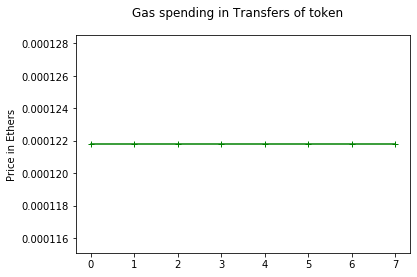

In [29]:
y1 = gas_establishing_connections

fig, ax1 = plt.subplots()
fig.suptitle('Gas spending in Transfers of token')
# plt.ylim(bottom, top) 
# plt.ylim(top =  0.00015)
# plt.ylim(bottom =  0.00013)
ax1.plot(y1, '+-', color='green')
ax1.set_ylabel('Price in Ethers')

plt.show()

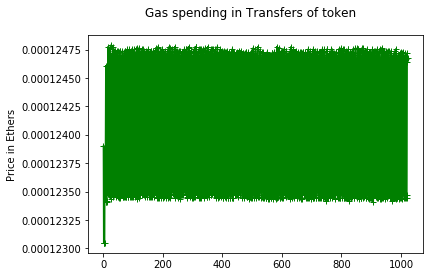

In [30]:
y1 = gas_passingValue

fig, ax1 = plt.subplots()
fig.suptitle('Gas spending in Transfers of token')
# plt.ylim(bottom, top) 
# plt.ylim(top =  0.00015)
# plt.ylim(bottom =  0.00013)
ax1.plot(y1, '+-', color='green')
ax1.set_ylabel('Price in Ethers')

plt.show()

### Ethers Spent (contract deployment, contract call i.e. transactions w.r.t. payload from addresses)

### Total Ethers spent by a GRID node (payload comparision)

### Retrieving Data time (Filters) Focus more "regenerating transaction as per iteration"

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00,

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

